# Test notebook

In [1]:
# Import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import time

In [2]:
# Import written libraries
import src.utils as ut
import src.fuzz as fz
import src.classif as cl

Generated 300 all-positive samples in 4D space.
Normalized data: 300 samples in 4D space.
Epoch  0
Leave one out avec k = 1


Leave one out avec k = 2
Leave one out avec k = 3
Leave one out avec k = 4
Leave one out avec k = 5
Leave one out avec k = 6
Leave one out avec k = 7
Leave one out avec k = 8
Leave one out avec k = 9
Leave one out avec k = 10
Result in 114.4793 seconds.
Epoch  1
Leave one out avec k = 1
Leave one out avec k = 2
Leave one out avec k = 3
Leave one out avec k = 4
Leave one out avec k = 5
Leave one out avec k = 6
Leave one out avec k = 7
Leave one out avec k = 8
Leave one out avec k = 9
Leave one out avec k = 10
Result in 115.4270 seconds.
Epoch  2
Leave one out avec k = 1
Leave one out avec k = 2
Leave one out avec k = 3
Leave one out avec k = 4
Leave one out avec k = 5
Leave one out avec k = 6
Leave one out avec k = 7
Leave one out avec k = 8
Leave one out avec k = 9
Leave one out avec k = 10
Result in 115.0245 seconds.
Epoch  3
Leave one out avec k = 1
Leave one out avec k = 2
Leave one out avec k = 3
Leave one out avec k = 4
Leave one out avec k = 5
Leave one out avec k = 6
Leave one o

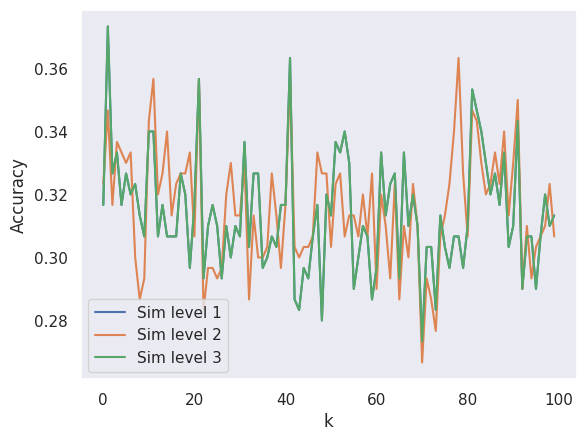

In [7]:
# Hyperparameters
dim = 4
nb_classes = 3
nb_points_per_class = 100

# Generate positive gaussian random variables
data, labels = ut.dynamic_generate_positive_gaussian_data(
    dim=dim,
    nb_classes=nb_classes,
    nb_points_per_class=nb_points_per_class,
    seed=42
)
print(f"Generated {data.shape[0]} all-positive samples in {dim}D space.")

# Normalize data
data_norm = fz.batch_norm(data)
data_labels = ut.convert_to_float_lst(labels)
print(f"Normalized data: {data_norm.shape[0]} samples in {data_norm.shape[1]}D space.")


# LOO evaluation
# Define list for each sim level
l1 = []
l2 = []
l3 = []
k = 10

for i in range(10):
    print("Epoch ", i)
    mu = fz.generate_capacity(ut.enumerate_permute_batch(data_norm[0]),2**len(data_norm[0])-1)

    tic = time.time()
    for k in range(1, k+1): 
        print(f"Leave one out avec k = {k}")
        
        # SimLevel1
        res = cl.leave_one_out(
                C = cl.KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=fz.SimLevel1), 
                DS = (data_norm, data_labels)
            )
        l1.append(res)

        # Sim level 2
        res = cl.leave_one_out(
                C = cl.KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=fz.SimLevel2), 
                DS = (data_norm, data_labels)
            )
        l2.append(res)

        # Sim level 3
        res = cl.leave_one_out(
                C = cl.KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=fz.SimLevel3), 
                DS = (data_norm, data_labels)
            )
        l3.append(res)

    toc = time.time()
    print(f"Result in {(toc-tic):0.4f} seconds.")

# Plot results
plt.plot(l1, label="Sim level 1")
plt.plot(l2, label="Sim level 2")
plt.plot(l3, label="Sim level 3")

# Config additional params
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.grid()
plt.legend()
plt.savefig("archive/accuracy.png")

Result in 114.0631 seconds.


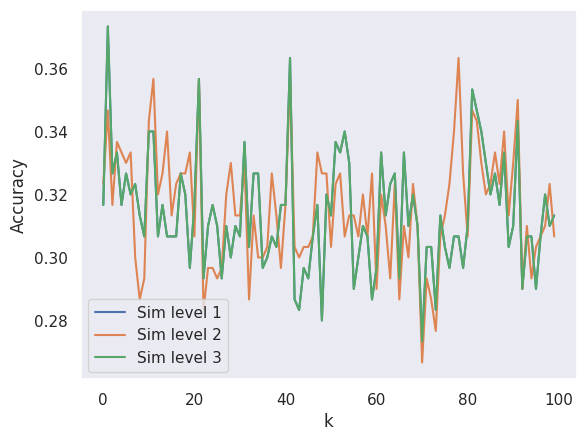

In [8]:
print(f"Result in {(toc-tic):0.4f} seconds.")

# Plot results
plt.plot(l1, label="Sim level 1")
plt.plot(l2, label="Sim level 2")
plt.plot(l3, label="Sim level 3")

# Config additional params
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.grid()
plt.legend()
plt.savefig("archive/accuracy.png")